# PRML Figure 9.8
Reference:
- https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture
- https://scikit-learn.org/stable/modules/mixture.html#mixture

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Dataset

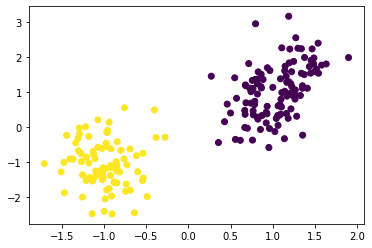

In [2]:
mu_A = np.array([-1., -1.])
mu_B = np.array([+1., +1.])
sigma_A = np.array([[0.1, 0], [0, 0.5]])
sigma_B = np.array([[0.1, 0.1], [0.1, 0.5]])
pi_A = 0.6
pi_B = 0.4

def sample_data(n):
    z = np.random.choice(2, n, p=[pi_A, pi_B])[:, np.newaxis]
    A = np.random.multivariate_normal(mu_A, sigma_A, size=n)
    B = np.random.multivariate_normal(mu_B, sigma_B, size=n)
    x = np.where(z, A, B)
    return x, z

x, z = sample_data(200)
_ = plt.scatter(x[:, 0], x[:, 1], c=z)

### Plotのための準備

In [3]:
# For contour plot
n_grid = 200
xx, yy =  np.meshgrid(np.linspace(-3, 3, n_grid), np.linspace(-3, 3, n_grid))
xy = np.array([xx, yy]).reshape([2, -1]).T


def gauss2d(x, mean, cov):
    inv = np.linalg.inv(cov)
    p = np.einsum("ij,jk,ik->i", x - mean, inv, x - mean)
    return  np.exp(-p / 2) / (2 * np.pi)


def fit_and_plot(K, print_detcov=False):
    from sklearn.mixture import GaussianMixture
    gm = GaussianMixture(n_components=K, init_params='kmeans').fit(x)

    for i in range(K):
        # print(f"{i}-gaussian")
        # print(f"  means       = {gm.means_[i]}")
        # print(f"  covariances = {gm.covariances_[i].tolist()}")
        if print_detcov:
            print(f"{i}-gaussian, det(cov) = {np.linalg.det(gm.covariances_[i])}")

        f = gauss2d(xy, gm.means_[i], gm.covariances_[i])
        _ = plt.contour(xx, yy, f.reshape([n_grid, n_grid]), levels=1)

    _ = plt.scatter(x[:, 0], x[:, 1], c=z)


## Fit (K=1)

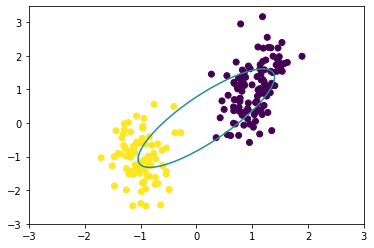

In [4]:
fit_and_plot(K=1)

## Fit (K=2)

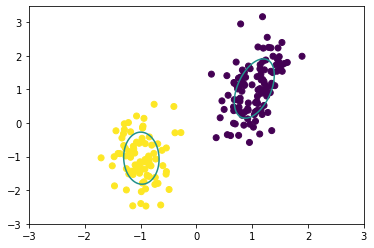

In [5]:
fit_and_plot(K=2)

## Fit (K=3)

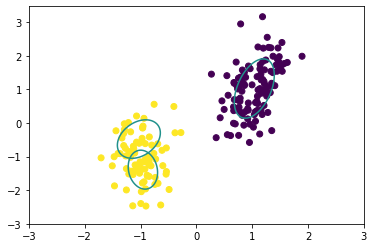

In [6]:
fit_and_plot(K=3)

## Fit (K=20)

0-gaussian, det(cov) = 0.00023590805187736387
1-gaussian, det(cov) = 6.490771654309968e-05
2-gaussian, det(cov) = 0.0018886075407853933
3-gaussian, det(cov) = 0.0004987958767817152
4-gaussian, det(cov) = 4.6339172004752365e-05
5-gaussian, det(cov) = 0.0002499708512994029
6-gaussian, det(cov) = 0.0014378217299890785
7-gaussian, det(cov) = 2.7882759449811857e-05
8-gaussian, det(cov) = 5.4611084940415584e-05
9-gaussian, det(cov) = 0.00012767198408247284
10-gaussian, det(cov) = 3.238785874545302e-08
11-gaussian, det(cov) = 0.0016103258194152261
12-gaussian, det(cov) = 0.00019897693414913743
13-gaussian, det(cov) = 4.70327231994577e-05
14-gaussian, det(cov) = 0.0010610738017906218
15-gaussian, det(cov) = 0.0002923661717717288
16-gaussian, det(cov) = 0.001893844291676888
17-gaussian, det(cov) = 5.000926177016511e-08
18-gaussian, det(cov) = 6.673070770316657e-05
19-gaussian, det(cov) = 0.0008654973528155439


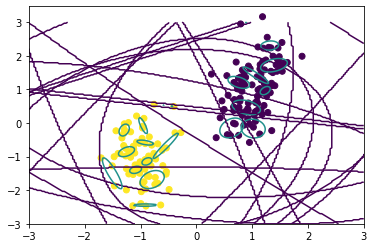

In [7]:
fit_and_plot(20, print_detcov=True)